# Laboratorio: Regresion logística usando numpy
Este es el notebook correspondiente al laboratorio de regresión logística. Usted deberá implementar el algoritmo en base al notebook de la [regresión lineal](../regresion_lineal/lin_reg.ipynb).

## Instrucciones
Deberá implementar y completar código faltante correspondiente a las siguientes funciones:
  - **Función sigmoide**: $g(z) = \frac{1}{1 + e^{-z}}$
  - **Hipótesis**: $h(X) = g(\theta^T * X)$
  - **Verosimilitud Logaritmica**: $l(\theta) = \frac{1}{m} \sum_{i=1}^m y^{(i)}\log{h(x^{(i)}) + (1 - y^{(i)})(1 - \log{h(x^{(i)})})}$
  - **Gradiente de la Verosimilitud**: $\nabla l(\theta) = \frac{1}{m} (y - h(X)) *  X^T$

También deberá completar el código faltante para la inicialización y la implementación del **ascenso de gradiente**

Modifique los **hiperpámetros** $\alpha$ y el número de iteraciones para obtener un resultado adecuado.

**Nota:** Solo deberá modificar porciones de código marcadas con:

```python
###-----------------------
### CODIGO DEL ESTUDIANTE
###-----------------------
```

## Evaluación
El algoritmo implementado deberá ser capaz de entrenar con éxito un modelo de regresión logística para clasificación binaria, se comparará el valor de la función $l(\theta)$ inicial con el valor final, debiendo el valor final ser mayor al inicial ya que se intenta maximizar la Verosimilitud a través del ascenso de gradiente.

Use las gráficas de la **curva de aprendizaje** para analizar la evolución de la función $l(\theta)$ durante el entrenamiento. La curva de aprendizaje deberá converger en un valor mayor al inicial.

## Recomendaciones
Ejecute el notebook de la regresión lineal de principio a fin y asegúrese de comprender bien cada celda antes de intentar implementar la regresión logística. Gran parte de este laboratorio está basado en la implementación de la regresión lineal.

Realice pruebas de consistencia de cada función implementada en una sesión interactiva para garantizar el funcionamiento correcto. Es útil realizar un análisis de las dimensiones de las matrices utilizadas.

Use el código disponible en el notebook de la regresión lineal como referencia. La mayoría del código de este ejercicio puede ser extraído y modificado fácilmente en base al notebook anterior.


In [24]:
# import math 
import numpy as np
from utils import load_classification_data

## Funciones para la regresión logística

> IMPLEMENTAR FUNCIONES

  - **Función sigmoide**: $g(z) = \frac{1}{1 + e^{-z}}$
  



In [25]:
def g(z):
    'Funcion sigmoide'  
    return 1 / (1 + np.exp(-z))

- **Hipótesis**: $h(X) = g(\theta^T * X)$

In [26]:
def h(X, theta):
    'Hipotesis de la regresion Logistica, devuelve una matriz de (1,m)'
    return g(np.dot(np.transpose(theta), X))

 - **Verosimilitud Logaritmica**: $l(\theta) = \frac{1}{m} \sum_{i=1}^m y^{(i)}\log{h(x^{(i)}) + (1 - y^{(i)})(1 - \log{h(x^{(i)})})}$

In [27]:
def l(X, y, theta):
    'Funcion de verosimilitud logaritmica de la regresion logistica, devuelve un escalar'
    # m = X.shape[1]
    return (1 / m) * np.sum(y * np.log(h(X, theta)) + (1 - y) * (1 - np.log(h(X, theta))))

- **Gradiente de la Verosimilitud**: $\nabla l(\theta) = \frac{1}{m} (y - h(X)) *  X^T$

In [28]:
def dl(X, y, theta):
    'Gradiente de la verosimilitud con respecto a theta, devuelve una matriz de (n + 1, 1)'
    # m = X.shape[1]
    return (1 / m) * np.dot(y - (h(X, theta)), np.transpose(X)).reshape((-1, 1))

## Importar y preprocesar el dataset
Para poder entrenar la regresion lineal de forma exitosa, se debe realizar un procesamiento previo (normalizacion)
> NO MODIFICAR

In [29]:
# Importar el dataset
X, y = load_classification_data()

m = X.shape[1]  # Numero de ejemplos
n = X.shape[0]  # Numero de caracteristicas

# dimensiones
print(f'X:{X.shape}, y: {y.shape}')

# Normalizar los vectores de entrada y salida
X = (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)

# Agregar una fila de 1 al inicio del dataset
unos = np.ones((1, m))

X = np.append(unos, X, axis=0)
print(f'X_:{X.shape}, y: {y.shape}')

X:(30, 569), y: (1, 569)
X_:(31, 569), y: (1, 569)


## Entrenamiento
Primero debemos inicializar los hiperparametros y luego ejecutar el bucle de entrenamiento usando descenso de gradiente

### Hiperparametros
Los hiperparametros son parametros o valores que podemos controlar pero que no son los parametros del modelo predictivo ($\Theta$)
> ASIGNAR VALORES


In [30]:
alpha = 0.04
iteraciones = 2000


### Inicializacion de los parametros de la regresion
Se recomienda inicializar los parametros $\Theta$ de forma aleatoria.
> IMPLEMENTAR CODIGO

In [31]:

theta = np.random.random((n + 1, 1))

### Registro del entrenamiento
En cada iteracion del descenso de gradiente vamos a almacenar los valores de la funcion de costo y los gradientes

In [32]:
registro_grads = []
registro_l = []
l_init = l(X, y, theta)
print(f'Verosimilitud inicial: {l_init}')
registro_l.append(l_init)

Verosimilitud inicial: -3.167139370294329


## Ascenso de gradiente
> IMPLEMENTAR CODIGO

In [33]:
for i in range(iteraciones):
    # calcular la gradiente
    dtheta = dl(X, y, theta)
    # actualizar parametros (ascenso de gradiente)
    theta = theta + alpha * dtheta
    
    registro_l.append(l(X, y, theta))
    registro_grads.append(dtheta)

print(f'Verosimilitud final: {l(X, y, theta)}')

Verosimilitud final: 3.6785957567088063


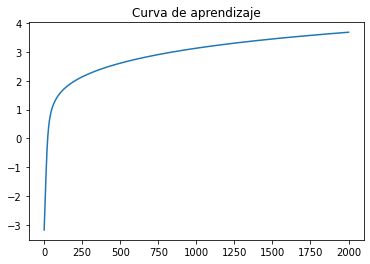

In [34]:
import matplotlib.pyplot as plt
it = list(range(iteraciones + 1))
plt.plot(it, registro_l)
plt.title('Curva de aprendizaje')
plt.show()